In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#This is a simple dataset to start with. 
#It contains only the height (inches) and weights (pounds) of 25,000 different humans of 18 years of age. 
#This dataset can be used to build a model that can predict the heights or weights of a human.

In [4]:
height = pd.read_csv("heights_weights.csv")
height.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [5]:
# Assuming EDA, Profiling and Preprocessing has been done

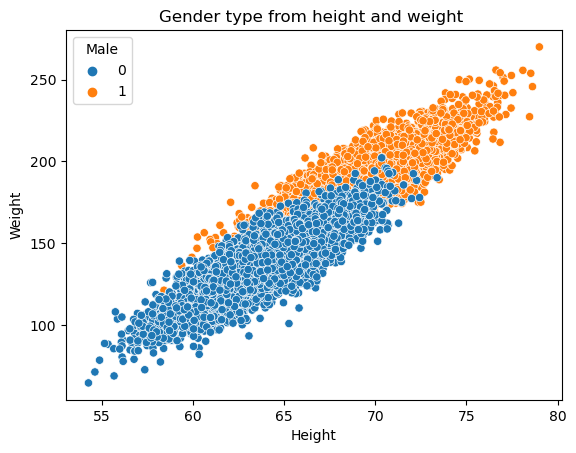

In [6]:
# Visualization to see number of males and females

sns.scatterplot(data = height, x = "Height", y = "Weight", hue = "Male" )
plt.title("Gender type from height and weight ")
plt.show()

In [7]:
# Seperate into predictors and predicted
x = height.iloc[:, :-1]
y = height.iloc[:,-1]
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [8]:
# Seperate into Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=42)

### USING LOGISTIC REGRESSION

In [9]:
#Training the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg') 
#Fit to train model
model.fit(x_train, y_train )

LogisticRegression(solver='newton-cg')

In [10]:
# Predicting the y
y_predict = model.predict(x_test)
y_predict

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [11]:
#Convert to Dataframe getting ready for merging into dataframe
x_df = pd.DataFrame(x_test)
x_df = x_df.reset_index()
x_df = x_df.drop(columns="index", axis = 1)
x_df.sample()

,Height,Weight
2259,65.763494,163.23084


In [12]:
#converting actual male to dataframe
y_df = pd.DataFrame(y_test).reset_index()

y_df = y_df.drop(columns="index", axis = 1)
y_df[:3]

,Male
0,0
1,1
2,1


In [13]:
#renaming and converting the predicted gender to dataframe
y_dfpre = pd.DataFrame(y_predict).rename(columns = {0: "Predicted_male"})
y_dfpre[:2]

,Predicted_male
0,1
1,1


In [15]:
#Merging the X's with the Y into a Dataframe
merged = pd.concat([x_df, y_df, y_dfpre],axis = 1)
merged.head(2)

,Height,Weight,Male,Predicted_male
0,68.687232,173.115813,0,1
1,68.829334,195.162042,1,1


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix  #you can add as many as possible
print(round(accuracy_score(y_test, y_predict) * 100, 2), "%")

92.2 %


In [18]:
confusion_matrix(y_test, y_predict)

array([[1334,  129],
       [ 105, 1432]], dtype=int64)

### USING KNN

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
height = pd.read_csv("heights_weights.csv")
height.head()

# separate x and y values
x = height.iloc[:, 0:-1].values
y = height.iloc[:, -1].values


# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_test[:3]

array([[-0.43026535, -0.73100564],
       [ 0.23354095,  0.80645084],
       [ 2.12178464,  1.71654721]])

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
# Elbow method to know the value for k, by default k is 5
test_error_rates = []
for k in range(1, 10):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    y_pred_test = knn_model.predict(x_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)
test_error_rates[:5]

[0.1213333333333333,
 0.126,
 0.10499999999999998,
 0.10466666666666669,
 0.09799999999999998]

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(round(accuracy_score(y_test, y_predict) * 100, 2), "%")

90.2 %


In [26]:
confusion_matrix(y_test, y_predict)

array([[1364,  125],
       [ 169, 1342]], dtype=int64)

### USING DECISION TREE

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
height = pd.read_csv("heights_weights.csv")
height.head()

# separate x and y values
x = height.iloc[:, 0:-1].values
y = height.iloc[:, -1].values


# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_test[:3]

array([[-0.43026535, -0.73100564],
       [ 0.23354095,  0.80645084],
       [ 2.12178464,  1.71654721]])

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',splitter ='best')
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(round(accuracy_score(y_test, y_predict) * 100, 2), "%")

87.53 %


In [43]:
confusion_matrix(y_test, y_predict)

array([[1322,  167],
       [ 207, 1304]], dtype=int64)

### USING RANDOM FOREST

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
height = pd.read_csv("heights_weights.csv")
height.head()

# separate x and y values
x = height.iloc[:, 0:-1].values
y = height.iloc[:, -1].values


# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_test[:3]

array([[-0.43026535, -0.73100564],
       [ 0.23354095,  0.80645084],
       [ 2.12178464,  1.71654721]])

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(round(accuracy_score(y_test, y_predict) * 100, 2), "%")

90.23 %


In [47]:
confusion_matrix(y_test, y_predict)

array([[1371,  118],
       [ 175, 1336]], dtype=int64)

### USING SUPPORT VECTOR MACHINE

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
height = pd.read_csv("heights_weights.csv")
height.head()

# separate x and y values
x = height.iloc[:, 0:-1].values
y = height.iloc[:, -1].values


# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_test[:3]

array([[-0.43026535, -0.73100564],
       [ 0.23354095,  0.80645084],
       [ 2.12178464,  1.71654721]])

In [49]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
confusion_matrix(y_test, y_predict)

array([[1377,  112],
       [ 145, 1366]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(round(accuracy_score(y_test, y_predict) * 100, 2), "%")

91.43 %


### USING NAIVES BAYES

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
height = pd.read_csv("heights_weights.csv")
height.head()

# separate x and y values
x = height.iloc[:, 0:-1].values
y = height.iloc[:, -1].values


# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_test[:3]

array([[-0.43026535, -0.73100564],
       [ 0.23354095,  0.80645084],
       [ 2.12178464,  1.71654721]])

In [54]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_predict =  model.predict(x_test)
y_predict

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(round(accuracy_score(y_test, y_predict) * 100, 2), "%")

88.2 %


In [57]:
confusion_matrix(y_test, y_predict)

array([[1328,  161],
       [ 193, 1318]], dtype=int64)

In [58]:
#The model with the highest acciracy was logistic regression so that seems to be the best
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg') 
#Fit to train model
model.fit(x_train, y_train )


#Future Prediction
#Nb: Height is (inches) and weight in (lbs)
height = float(input("Enter your height (inches)"))
weight = float(input("Enter your weight (lbs)"))

prediction = model.predict([[height, weight]])
if prediction== 1:
    result = 'Male'
else:
    result = 'Female'
print(f"Your gender is {result}")

Enter your height (inches)6496.06
Enter your weight (lbs)108.027
Your gender is Female
